# Train VAE for task2

This attemt is the same settings with ['00-train-test-2_RECvsKLD=1vs.01.ipynb'](00-train-test-2_RECvsKLD=1vs.01.ipynb).

Evaluated with all the tests.

Loss function is weighted as: $loss = L_{Reconstruction} + 0.01 L_{KLD}$

In [1]:
# public modules
from dlcliche.notebook import *
from dlcliche.utils import (
    sys, random, Path, np, plt, EasyDict,
    ensure_folder, deterministic_everything,
)
from argparse import Namespace

# private modules
sys.path.append('..')
import common as com

from pytorch_common import *
from model import VAE, VAE_loss_function

# loading parameters -> hparams (argparse compatible)
params = EasyDict(com.yaml_load('config.yaml'))

# create working directory
ensure_folder(params.model_directory)

# test directories
dirs = com.select_dirs(param=params, mode='development')

# fix random seeds
deterministic_everything(2020, pytorch=True)

# PyTorch device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2020-03-16 11:30:54,369 - INFO - load_directory <- development


In [2]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

Reusing TensorBoard on port 6007 (pid 28384), started 1 day, 17:41:19 ago. (Use '!kill 28384' to kill it.)

In [3]:
# VAE Training class

class Task2VAELightning(Task2Lightning):

    def training_step(self, batch, batch_nb):
        x, y = batch
        y_hat, z, mu, logvar = self.model.forward_all(x)
        loss = VAE_loss_function(recon_x=y_hat, x=x, mu=mu, logvar=logvar,
                                 reconst_loss='mse',
                                 a_RECONST=1.,
                                 a_KLD=.01)
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}


# train models

for target_dir in dirs:
    target = str(target_dir).split('/')[-1]
    print(f'==== Start training [{target}] with {torch.cuda.device_count()} GPU(s). ====')

    files = com.file_list_generator(target_dir)

    model = VAE(device, x_dim=params.VAE.x_dim, h_dim=params.VAE.h_dim, z_dim=params.VAE.z_dim).to(device)
    if target == 'ToyCar': summary(device, model)
    task2 = Task2VAELightning(device, model, params, files, normalize=True)
    trainer = pl.Trainer(max_epochs=params.fit.epochs,
                         gpus=torch.cuda.device_count())
    trainer.fit(task2)
    
    model_file = f'{params.model_directory}/model_{target}.pth'
    torch.save(task2.model.state_dict(), model_file)
    print(f'saved {model_file}.\n')

2020-03-14 17:49:38,989 - INFO - target_dir : dev_data/ToyCar
2020-03-14 17:49:38,997 - INFO - # of training samples : 4000


==== Start training [ToyCar] with 1 GPU(s). ====
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         256,400
            Linear-2                  [-1, 400]         160,400
            Linear-3                   [-1, 20]           8,020
            Linear-4                   [-1, 20]           8,020
            Linear-5                  [-1, 400]           8,400
            Linear-6                  [-1, 400]         160,400
            Linear-7                  [-1, 640]         256,640
Total params: 858,280
Trainable params: 858,280
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.27
Estimated Total Size (MB): 3.29
----------------------------------------------------------------


2020-03-14 17:49:41,145 - INFO - Creating data for 400 files: size=136000, shape=(640,)


2020-03-14 17:49:45,684 - INFO - Creating data for 3600 files: size=1224000, shape=(640,)


2020-03-14 17:50:29,792 - INFO - Loading cached __cache_ToyCar_val.npy


2020-03-14 18:55:10,464 - INFO - target_dir : dev_data/ToyConveyor
2020-03-14 18:55:10,469 - INFO - # of training samples : 3000



saved ./model/model_ToyCar.pth.

==== Start training [ToyConveyor] with 1 GPU(s). ====


2020-03-14 18:55:10,512 - INFO - Creating data for 300 files: size=92700, shape=(640,)


2020-03-14 18:55:13,541 - INFO - Creating data for 2700 files: size=834300, shape=(640,)


2020-03-14 18:55:41,570 - INFO - Loading cached __cache_ToyConveyor_val.npy


2020-03-14 19:39:46,281 - INFO - target_dir : dev_data/fan
2020-03-14 19:39:46,294 - INFO - # of training samples : 3675



saved ./model/model_ToyConveyor.pth.

==== Start training [fan] with 1 GPU(s). ====


2020-03-14 19:39:46,344 - INFO - Creating data for 367 files: size=113403, shape=(640,)


2020-03-14 19:39:49,977 - INFO - Creating data for 3308 files: size=1022172, shape=(640,)


2020-03-14 19:40:34,244 - INFO - Loading cached __cache_fan_val.npy


2020-03-14 20:35:04,329 - INFO - target_dir : dev_data/pump
2020-03-14 20:35:04,341 - INFO - # of training samples : 3349



saved ./model/model_fan.pth.

==== Start training [pump] with 1 GPU(s). ====


2020-03-14 20:35:04,395 - INFO - Creating data for 334 files: size=103206, shape=(640,)


2020-03-14 20:35:07,728 - INFO - Creating data for 3015 files: size=931635, shape=(640,)


2020-03-14 20:35:47,871 - INFO - Loading cached __cache_pump_val.npy


2020-03-14 21:25:29,077 - INFO - target_dir : dev_data/slider
2020-03-14 21:25:29,089 - INFO - # of training samples : 2804



saved ./model/model_pump.pth.

==== Start training [slider] with 1 GPU(s). ====


2020-03-14 21:25:29,148 - INFO - Creating data for 280 files: size=86520, shape=(640,)


2020-03-14 21:25:31,959 - INFO - Creating data for 2524 files: size=779916, shape=(640,)


2020-03-14 21:26:02,572 - INFO - Loading cached __cache_slider_val.npy


2020-03-14 22:07:29,755 - INFO - target_dir : dev_data/valve
2020-03-14 22:07:29,767 - INFO - # of training samples : 3291



saved ./model/model_slider.pth.

==== Start training [valve] with 1 GPU(s). ====


2020-03-14 22:07:29,827 - INFO - Creating data for 329 files: size=101661, shape=(640,)


2020-03-14 22:07:33,251 - INFO - Creating data for 2962 files: size=915258, shape=(640,)


2020-03-14 22:08:11,103 - INFO - Loading cached __cache_valve_val.npy



saved ./model/model_valve.pth.



## Visualize 

In [4]:
# Get one batch of samples from validation set, then get model prediction result.
dl = task2.val_dataloader()
x, y = next(iter(dl))
with torch.no_grad():
    yhat = task2.forward(x)

2020-03-15 07:54:55,777 - INFO - Loading cached __cache_valve_val.npy


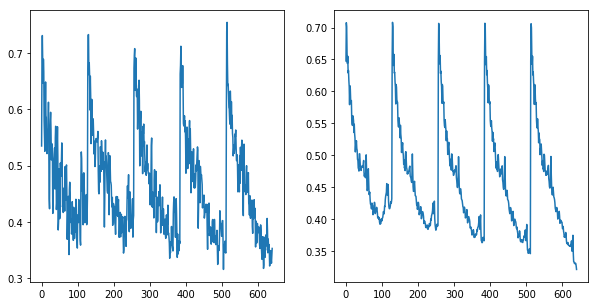

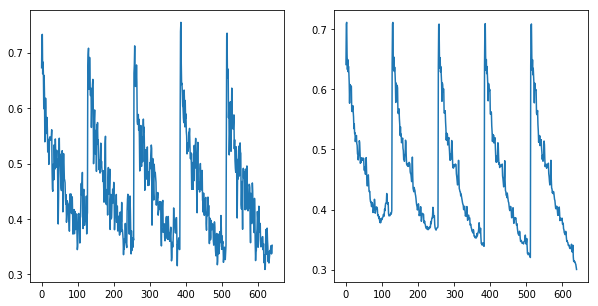

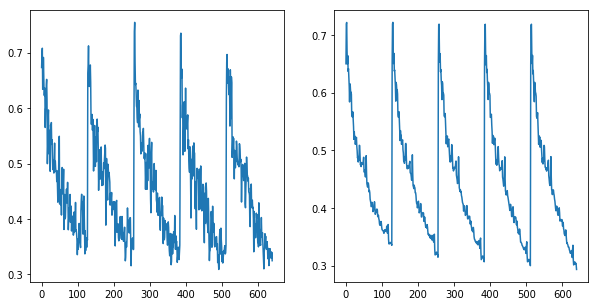

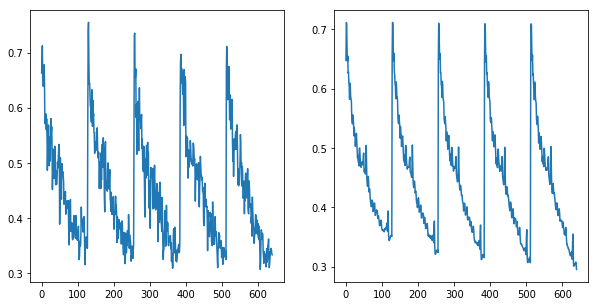

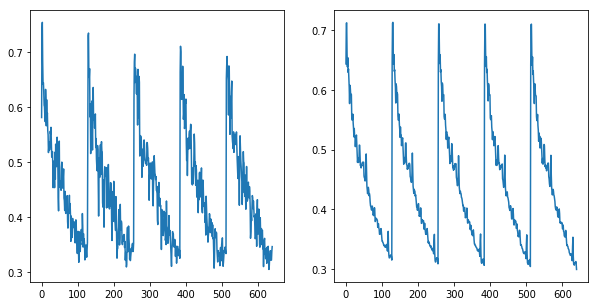

In [5]:
# Show 
for i in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sample_idx = i
    axs[0].plot(x.cpu().numpy()[sample_idx][0]); axs[1].plot(yhat.cpu().numpy()[sample_idx]);
    plt.show()

# Test the trained model

In [6]:
! python 01_test.py -d

2020-03-15 08:04:37,548 - INFO - load_directory <- development

[1/6] /home/dl/lab/task2/dcase2020_task2_variants/dev_data/ToyCar
============== MODEL LOAD ==============
2020-03-15 08:04:37,548 - INFO - loading model: ./model/model_ToyCar.pth
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         256,400
            Linear-2                  [-1, 400]         160,400
            Linear-3                   [-1, 20]           8,020
            Linear-4                   [-1, 20]           8,020
            Linear-5                  [-1, 400]           8,400
            Linear-6                  [-1, 400]         160,400
            Linear-7                  [-1, 640]         256,640
Total params: 858,280
Trainable params: 858,280
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pas

100%|████████████████████████████████████████| 507/507 [00:02<00:00, 213.20it/s]
2020-03-15 08:05:10,155 - INFO - anomaly score result ->  ./result/anomaly_score_fan_id_00.csv
2020-03-15 08:05:10,157 - INFO - AUC : 0.5661425061425062
2020-03-15 08:05:10,157 - INFO - pAUC : 0.4917884391568602

============ END OF TEST FOR A MACHINE ID ============
2020-03-15 08:05:10,157 - INFO - target_dir : /home/dl/lab/task2/dcase2020_task2_variants/dev_data/fan_id_02
2020-03-15 08:05:10,160 - INFO - test_file  num : 459


============== BEGIN TEST FOR A MACHINE ID ==============
100%|████████████████████████████████████████| 459/459 [00:02<00:00, 213.97it/s]
2020-03-15 08:05:12,306 - INFO - anomaly score result ->  ./result/anomaly_score_fan_id_02.csv
2020-03-15 08:05:12,308 - INFO - AUC : 0.6910027855153204
2020-03-15 08:05:12,308 - INFO - pAUC : 0.5488931241753409

============ END OF TEST FOR A MACHINE ID ============
2020-03-15 08:05:12,308 - INFO - target_dir : /home/dl/lab/task2/dcase2020_task

100%|████████████████████████████████████████| 278/278 [00:01<00:00, 214.24it/s]
2020-03-15 08:05:25,959 - INFO - anomaly score result ->  ./result/anomaly_score_slider_id_04.csv
2020-03-15 08:05:25,961 - INFO - AUC : 0.9159550561797754
2020-03-15 08:05:25,961 - INFO - pAUC : 0.6723832052040213

============ END OF TEST FOR A MACHINE ID ============
2020-03-15 08:05:25,961 - INFO - target_dir : /home/dl/lab/task2/dcase2020_task2_variants/dev_data/slider_id_06
2020-03-15 08:05:25,963 - INFO - test_file  num : 189


============== BEGIN TEST FOR A MACHINE ID ==============
100%|████████████████████████████████████████| 189/189 [00:00<00:00, 212.61it/s]
2020-03-15 08:05:26,853 - INFO - anomaly score result ->  ./result/anomaly_score_slider_id_06.csv
2020-03-15 08:05:26,854 - INFO - AUC : 0.6741573033707865
2020-03-15 08:05:26,854 - INFO - pAUC : 0.4861028976936724

============ END OF TEST FOR A MACHINE ID ============

[6/6] /home/dl/lab/task2/dcase2020_task2_variants/dev_data/valve
====

In [1]:
def upto_6digits(cell):
    if not cell[0].isdigit(): return cell
    return f'{float(cell):.6f}'

with open('result/result.csv') as f:
    for l in f.readlines():
        l = l.strip() #replace('\n', '')
        if ',' not in l:
            print(l)
            continue
        ls = l.split(',')
        print(f'{ls[0]}\t\t{upto_6digits(ls[1])}\t\t{upto_6digits(ls[2])}')

ToyCar
id		AUC		pAUC
01		0.791331		0.665015
02		0.843655		0.766151
03		0.615191		0.540928
04		0.851536		0.700667
Average		0.775428		0.668190

ToyConveyor
id		AUC		pAUC
01		0.714744		0.579638
02		0.614856		0.525890
03		0.710169		0.577999
Average		0.679923		0.561176

fan
id		AUC		pAUC
00		0.566143		0.491788
02		0.691003		0.548893
04		0.599511		0.525408
06		0.695817		0.523692
Average		0.638118		0.522445

pump
id		AUC		pAUC
00		0.660000		0.569378
02		0.591712		0.569938
04		0.867700		0.670526
06		0.738824		0.589267
Average		0.714559		0.599777

slider
id		AUC		pAUC
00		0.970337		0.859551
02		0.769438		0.624483
04		0.915955		0.672383
06		0.674157		0.486103
Average		0.832472		0.660630

valve
id		AUC		pAUC
00		0.588571		0.509067
02		0.617083		0.518421
04		0.691250		0.513158
06		0.530583		0.482456
Average		0.606872		0.505775

